## 에러 데이터 분석

In [5]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
font = {'size': 16, 'family':"Malgun Gothic"}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

data_path = 'data/'
N_ERRTYPE = 42
img_save = False

### 학습 데이터 로드

In [24]:
train_err = pd.read_csv(data_path + 'train_err_data.csv')

# 전처리
# 중복제거
train_err.drop_duplicates(inplace=True)
train_err = train_err.reset_index(drop=True)

# fwver의 8.x.x를 08.x.x로 변경
idx = train_err['fwver'] == '8.5.3'
train_err.loc[idx, 'fwver'] = '08.5.3'

### model별, fwver별 평균 에러 발생량

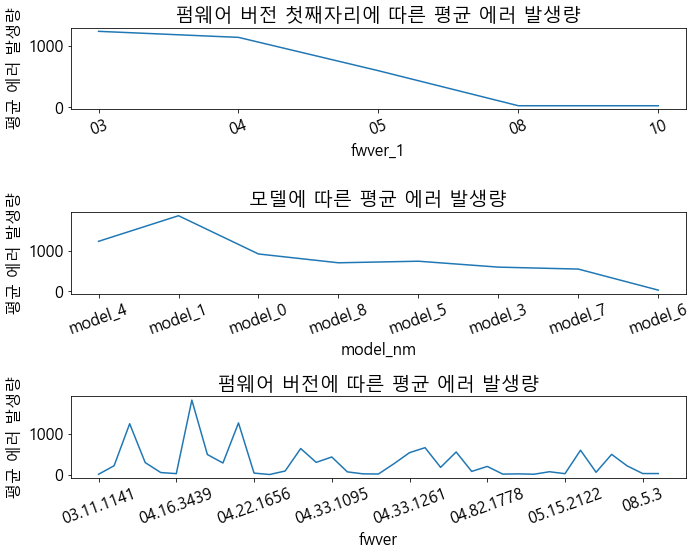

In [25]:
train_err['fwver_1'] = [col[:2] for col in train_err['fwver'].values]

unique_fwver = np.unique(train_err['fwver'].astype(str))
group = train_err.groupby('fwver')

df_fwver = pd.DataFrame(columns = unique_fwver)
for fwver in unique_fwver:
    df_fwver.loc[0, fwver] = len(np.unique(group.get_group(fwver)['user_id']))
    df_fwver.loc[1, fwver] = group.get_group(fwver)['user_id'].shape[0]
df_fwver.index = ['사용자 수','에러 발생량']

unique_model = ['model_'+str(i) for i in [4,1,0,1,8,5,3,7,6]]
# unique_model = np.unique(train_err['model_nm'].astype(str))
group = train_err.groupby('model_nm')

df_model = pd.DataFrame(columns = unique_fwver)
for model in unique_model:
    df_model.loc[0, model] = len(np.unique(group.get_group(model)['user_id']))
    df_model.loc[1, model] = group.get_group(model)['user_id'].shape[0]
df_model.index = ['사용자 수','에러 발생량']

unique_fwver_1 = np.unique(train_err['fwver_1'].astype(str))
group = train_err.groupby('fwver_1')

df_fwver_1 = pd.DataFrame(columns = unique_fwver_1)
for fwver_1 in unique_fwver_1:
    df_fwver_1.loc[0, fwver_1] = len(np.unique(group.get_group(fwver_1)['user_id']))
    df_fwver_1.loc[1, fwver_1] = group.get_group(fwver_1)['user_id'].shape[0]
df_fwver_1.index = ['사용자 수','에러 발생량']

plt.figure(1, figsize=(10,8))
plt.subplot(3,1,1)
df_fwver_1.loc['평균 에러 발생량',:] = df_fwver_1.T['에러 발생량'] / df_fwver_1.T['사용자 수']
df_fwver_1.T['평균 에러 발생량'].plot()
plt.xticks(range(df_fwver_1.shape[1]),df_fwver_1.columns, rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('fwver_1')
plt.title('펌웨어 버전 첫째자리에 따른 평균 에러 발생량')
# plt.show()

plt.subplot(3,1,2)
df_model.loc['평균 에러 발생량',:] = df_model.T['에러 발생량'] / df_model.T['사용자 수']
df_model.T['평균 에러 발생량'].plot(ax=plt.gca())
plt.xticks(rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('model_nm')
plt.title('모델에 따른 평균 에러 발생량')


plt.subplot(3,1,3)
df_fwver.loc['평균 에러 발생량',:] = df_fwver.T['에러 발생량'] / df_fwver.T['사용자 수']
df_fwver.T['평균 에러 발생량'].plot()
# df_fwver_col_breif = [c[:4] for c in df_fwver.columns]
plt.xticks(rotation=20)
plt.ylabel('평균 에러 발생량')
plt.xlabel('fwver')
plt.title('펌웨어 버전에 따른 평균 에러 발생량')

plt.tight_layout()
plt.show()

### 각 error type에 어떤 error code가 있고 각각이 몇개씩인지 err_code_dict에 정리

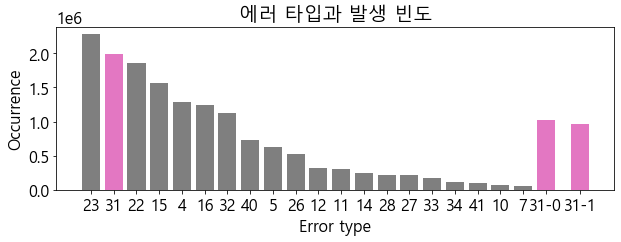

In [26]:
err_type = train_err['errtype']
err_code = train_err['errcode'].astype(str)

v, c = np.unique(err_type, return_counts = True)

idx2 = err_type == 31
err_code_sub = err_code.loc[idx2].values
# remove space
# err_code_sub = [s.replace(' ','') for s in err_code_sub]
v2, c2 = np.unique(err_code_sub, return_counts=True)

## 에러 타입과 발생 빈도
idx = np.argsort(c)
idx = idx[::-1]
NUM_SHOW = 20
plt.figure(figsize=(10,3))
plt.title('에러 타입과 발생 빈도')
plt.bar(range(NUM_SHOW), list(c[idx[:NUM_SHOW]]), color = 'tab:gray')
plt.bar([1, NUM_SHOW, NUM_SHOW+1.5], [c[idx[:NUM_SHOW]][1]] + list(c2), color = 'tab:pink')
plt.xticks(list(range(NUM_SHOW)) + [NUM_SHOW, NUM_SHOW+1.5], list(v[idx[:NUM_SHOW]]) + ['31-0','31-1'])
plt.xlabel('Error type')
plt.ylabel('Occurrence')
plt.show()

### Error type 38 추가 분석

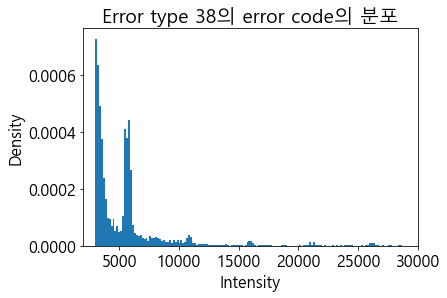

In [27]:
import seaborn as sns

idx_38 = err_type == 38

values = err_code.loc[idx_38].values.astype(int)
values_mean = values.mean()
values_std = values.std()

plt.hist(values, bins=30000, density=True)
plt.xlim(2000, 30000)
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.title('Error type 38의 error code의 분포')
plt.show()

### error type 5

error type 5
0001 === 2
2638 === 1
40013 === 1
60045 === 9
700001 === 402
B-51042 === 90
B-51049 === 635
B-A8002 === 575827
C-11017 === 142
C-11020 === 3
C-11087 === 1
C-12032 === 38
C-13039 === 1
C-13053 === 68
C-14014 === 11
CM a === 1
D-10011 === 1
D-99999 === 1
E-59902 === 4
En00402 === 9
En00406 === 2
En00409 === 3
H-51042 === 1027
H-51046 === 163
H-51048 === 18
H-51049 === 307
J-20029 === 2
J-30010 === 30
J-30021 === 765
J-40011 === 8
M-51007 === 8
M-51020 === 4
M-99999 === 75
P_41001 === 1
P_41007 === 1
Q-64001 === 192
Q-64002 === 11947
Q-73004 === 28
Q-73006 === 7
S-61001 === 34583
S-64000 === 2
S-64001 === 2
S-64002 === 138
S-65 === 1
S-65002 === 1582
U-81000 === 2
U-81009 === 8
U-81014 === 9
U-82004 === 6
U-82020 === 1
U-82023 === 2
U-82024 === 9
U-82026 === 62
V-21002 === 49
V-21003 === 6
V-21004 === 19
V-21005 === 177
V-21007 === 6
V-21008 === 1716
V-21010 === 30
Y-00004 === 1
Y-00005 === 9
Y-00008 === 23
http === 1
nan === 1


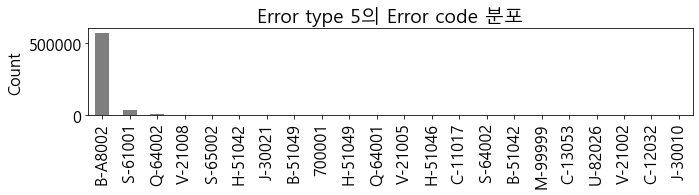

In [32]:
#%% 각 error type에 어떤 error code가 있고 각각이 몇개씩인지 err_code_dict에 정리
from collections import defaultdict
import numpy as np
err_type = train_err['errtype']
err_code = train_err['errcode'].astype(str)

err_code_dict = defaultdict(dict)
error = 5
print(f'error type {error}')
idx = err_type == error
err_code_sub = err_code.loc[idx].values
# remove space
# err_code_sub = [s.replace(' ','') for s in err_code_sub]
v, c = np.unique(err_code_sub, return_counts=True)
err_code_dict[error] = dict(zip(v, c))
for i, err_code_sub_c in enumerate(err_code_dict[error]):
    print(f'{err_code_sub_c} === {c[i]}')

err_code_df = pd.DataFrame(err_code_dict)

idx = np.argsort(err_code_df[error])[::-1]
reindex_ = err_code_df.index[idx]
err_code_df = err_code_df.reindex(index = reindex_)

plt.figure(1, figsize=(10,3))
err_code_df.iloc[:22].plot(kind='bar',label='columns',ax=plt.gca(), legend = False,
                               color = ['tab:gray'] * 22)
plt.title(f'Error type {error}의 Error code 분포')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('errtype_5.png',dpi=100)
plt.show()

## 추가 -- error, quality 관계 분석

In [57]:
from main import *

train_err = pd.read_csv(data_path + 'train_err_data.csv')
train_err['time'] = pd.to_datetime(train_err['time'], format='%Y%m%d%H%M%S')

# error code encoder load
encoder = get_encoder()
errcode_names = encoder.classes_

# 유저별로 processing하고 concatenate
err_df_in_day_user = split_error_data_in_day(train_err, 'train')
data_list = []
for user_idx in range(15000):
    data_list.append(err_df_in_day_user[user_idx])

err_list = []
for data in tqdm(data_list):
    err_list.append(transform_errtype(data))
train_err_arr = np.array(err_list)
train_err_arr = train_err_arr[:,:,-N_ERRTYPE-1:-1]

UNKNOWN error code for type 5 :: http
Encoding error code is done


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 12439/15000 [04:02<00:44, 57.72it/s]

UNKNOWN error code for type 5 :: http


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [04:52<00:00, 51.36it/s]


In [54]:
from tqdm import tqdm
train_quality = pd.read_csv(data_path + 'train_quality_data.csv')
train_quality.replace(",", "", regex=True, inplace=True)

drop_idx = np.any(train_quality == -1, axis=1)
train_quality = train_quality.loc[~drop_idx,:].reset_index(drop=True)

train_quality['time'] = pd.to_datetime(train_quality['time'], format='%Y%m%d%H%M%S')

invalid_idx = train_quality['time'].dt.month != 11
train_quality = train_quality.loc[~invalid_idx,:].reset_index(drop=True)

train_user_id = list(range(10000, 25000))
train_quality_arr = np.zeros((len(train_user_id), 13, 30))

for user_id in tqdm(np.unique(train_quality['user_id'])):
    idx = train_quality['user_id'] == user_id
    days = train_quality.loc[idx,'time'].dt.day
    if idx.sum() == 0:
        continue
    for day in np.unique(days):
        idx2 = days == day
        val = train_quality.loc[idx.values, 'quality_0':'quality_12'].iloc[idx2.values].astype(float)
        if val.shape[0] != 0:    
            train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

C:\ProgramData\Anaconda3\envs\dash-datashader\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  0%|▉                                                                                                                                                                                            | 41/8281 [00:00<01:09, 118.40it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty s

  1%|██▋                                                                                                                                                                                         | 116/8281 [00:00<01:03, 129.06it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

  3%|██████▎                                                                                                                                                                                     | 278/8281 [00:02<01:04, 124.84it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

  7%|████████████▊                                                                                                                                                                               | 567/8281 [00:04<00:59, 128.71it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

  8%|██████████████▋                                                                                                                                                                             | 648/8281 [00:05<00:55, 136.88it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

  9%|████████████████▎                                                                                                                                                                           | 717/8281 [00:05<01:08, 110.35it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 11%|████████████████████▍                                                                                                                                                                       | 898/8281 [00:07<01:03, 115.76it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 12%|█████████████████████▊                                                                                                                                                                      | 961/8281 [00:07<01:02, 117.40it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 12%|██████████████████████▉                                                                                                                                                                    | 1018/8281 [00:08<00:55, 130.02it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 13%|███████████████████████▍                           

 14%|█████████████████████████▌                                                                                                                                                                 | 1132/8281 [00:09<00:53, 133.55it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 14%|██████████████████████████▉                                                                                                                                                                | 1193/8281 [00:09<01:06, 106.93it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 15%|███████████████████████████▎                                                                                                                                                               | 1207/

 16%|██████████████████████████████▏                                                                                                                                                            | 1335/8281 [00:11<00:59, 116.70it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 17%|███████████████████████████████                                                                                                                                                            | 1375/8281 [00:11<01:08, 100.30it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 20%|████████████████████████████████████▍                                                                                                                                                      | 1616/8281 [00:13<00:52, 126.44it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 20%|█████████████████████████████████████▍                                                                                                   

 22%|████████████████████████████████████████▍                                                                                                                                                  | 1790/8281 [00:14<00:56, 114.02it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 23%|██████████████████████████████████████████▌                                                                                                                                                | 1886/8281 [00:15<00:51, 123.64it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 23%|███████████████████████████████████████████▏                                                                                                                                               | 1915/8281 [00:15<00:53, 118.98it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

 24%|████████████████████████████████████████████▌                                                                                                                                              | 1974/8281 [00:16<00:48, 130.94it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 24%|████████████████████████████████████████████▉                                                                                                                                              | 1990/8281 [00:16<00:49, 125.87it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 28%|█████████████████████████████████████████████████████▏                                                                                                                                     | 2356/8281 [00:19<00:54, 108.81it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 29%|█████████████████████████████████████████████████████▌                                                                                                                                     | 2371/

 30%|███████████████████████████████████████████████████████▎                                                                                                                                   | 2447/8281 [00:20<00:41, 139.63it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 32%|████████████████████████████████████████████████████████████                                                                                                                               | 2662/8281 [00:21<00:46, 121.01it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 33%|█████████████████████████████████████████████████████████████▍                                                                           

 34%|███████████████████████████████████████████████████████████████▊                                                                                                                           | 2828/8281 [00:23<00:46, 117.31it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 35%|█████████████████████████████████████████████████████████████████▉                                                                                                                          | 2903/8281 [00:23<00:59, 89.70it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 36%|██████████████████████████████████████████████████████████████████▍                                                                                                                        | 2942/8281 [00:24<00:47, 112.73it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 37%|█████████████████████████████████████████████████████████████████████▋                                                                                                                     | 3084/8281 [00:25<00:46, 112.48it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 38%|██████████████████████████████████████████████████████████████████████▌                                                                                                                    | 3123/

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 40%|███████████████████████████████████████████████████████████████████████████▋                                                                                                               | 3350/8281 [00:27<00:38, 129.21it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 41%|███████████████████████████████████████████████████

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 42%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 3478/8281 [00:28<00:39, 121.09it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 43%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                         | 3593/8281 [00:29<00:32, 143.22it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 47%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 3915/8281 [00:32<00:39, 110.13it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 49%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 4046/8281 [00:33<00:40, 104.03it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 49%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 4058/8281 [00:33<00:42, 100.33it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

 50%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 4129/8281 [00:33<00:38, 109.18it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 50%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 4146/8281 [00:34<00:33, 122.24it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 4430/8281 [00:36<00:34, 112.79it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 4546/8281 [00:37<00:27, 135.82it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 4560/

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4846/8281 [00:39<00:30, 112.82it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4986/8281 [00:40<00:25, 129.30it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 5078/8281 [00:41<00:27, 117.18it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 5178/8281 [00:42<00:23, 132.23it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 5351/8281 [00:43<00:21, 135.57it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 5464/8281 [00:44<00:21, 128.06it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 5495/8281 [00:44<00:20, 132.87it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5661/8281 [00:46<00:24, 108.67it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5695/8281 [00:46<00:28, 90.79it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 5766/8281 [00:47<00:22, 110.68it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5800/8281 [00:47<00:24, 100.56it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 5845/8281 [00:47<00:19, 121.93it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 71%|███████████████████████████████████████████████████

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5967/8281 [00:48<00:18, 124.75it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 6025/8281 [00:49<00:16, 133.75it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 6136/8281 [00:50<00:22, 95.25it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 6249/8281 [00:51<00:17, 115.11it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 6263/

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 6356/8281 [00:52<00:16, 115.40it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 6562/8281 [00:53<00:15, 113.96it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6634/8281 [00:54<00:13, 121.10it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6774/8281 [00:55<00:13, 111.28it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6987/8281 [00:57<00:09, 138.30it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 7071/8281 [00:58<00:10, 112.07it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 7093/8281 [00:58<00:08, 136.77it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 7226/8281 [00:59<00:08, 120.93it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 7251/8281 [00:59<00:09, 103.43it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 7265/8281 [00:59<00:09, 111.32it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 7384/8281 [01:00<00:06, 135.73it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 7398/

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 7467/8281 [01:01<00:07, 115.38it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7547/8281 [01:02<00:05, 123.34it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7716/8281 [01:03<00:05, 105.31it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7946/8281 [01:05<00:02, 128.03it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 8055/8281 [01:06<00:02, 106.99it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 8145/8281 [01:06<00:01, 127.62it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
 99%|███████████████████████████████████████████████████

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 8246/8281 [01:07<00:00, 97.10it/s]<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean

<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
<ipython-input-54-2285b7eea45e>:25: RuntimeWarning: Mean of empty slice
  train_quality_arr[user_id-10000, :, day-1] = np.nanmean(val, axis=0)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8281/8281 [01:08<00:00, 121.58it/s]


In [68]:
results = np.zeros((13, 42))
for i in range(13):
    for j in range(42):
        results[i,j] = np.corrcoef(np.median(train_quality_arr[:,i,:],axis=1), np.median(train_err_arr, axis=1)[:,j])[0,1]

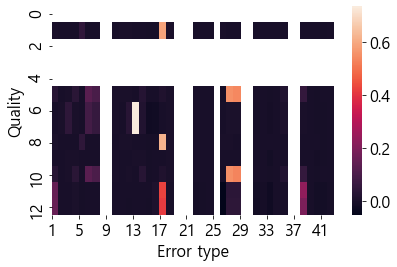

In [67]:
import seaborn as sns
plt.figure()
sns.heatmap(results)
plt.xticks(range(42)[::4], range(1, 43)[::4])
plt.ylabel('Quality')
plt.xlabel('Error type')
# plt.title('Quality와 Error type의 상관관계')
plt.tight_layout()
# plt.savefig('qual_error_corr.png',dpi=100)
plt.show()

###   추가 -- 문제발생 이전과 이후 평균 에러 발생량 분석

In [70]:
train_prob = pd.read_csv(data_path + 'train_problem_data.csv')

train_prob['time'] = pd.to_datetime(train_prob['time'], format='%Y%m%d%H%M%S')
train_prob['time_day'] = train_prob['time'].dt.day
train_prob['time_hour'] = train_prob['time'].dt.hour
# del train_prob['time']

# 일별로 변경
problem_arr = np.zeros((15000, 30), dtype=int)
for i in range(train_prob.shape[0]):
    user_id = train_prob.loc[i,'user_id']
    time_day = train_prob.loc[i, 'time_day']
    problem_arr[user_id - 10000, time_day-1] += 1

In [140]:
train_err_arr_sum = train_err_arr.sum(axis=2)

data_before = []
data_after = []
for lag in range(0, 10):
    error_counts = []
    for i in range(15000):
        idx = np.where(problem_arr[i,:])[0]
        if idx.sum() == 0:
            continue

        for day in idx:
            if day-lag >=0:
                error_count = train_err_arr_sum[i, day - lag:day - lag+1].sum()
                error_counts.append(error_count)
    error_counts = np.array(error_counts)
    data_before.append(error_counts)


for lag in range(1, 10):
    error_counts = []
    for i in range(15000):
        idx = np.where(problem_arr[i,:])[0]
        if idx.sum() == 0:
            continue
        for day in idx:
            if day+lag <= 30:
                error_count = train_err_arr_sum[i, day+lag-1:day+lag].sum()
                error_counts.append(error_count)
    error_counts = np.array(error_counts)
    data_after.append(error_counts)

before_mean = []
for data in reversed(data_before):
    before_mean.append(np.nanmean(data))
after_mean = []
for data in data_after:
    after_mean.append(np.nanmean(data))

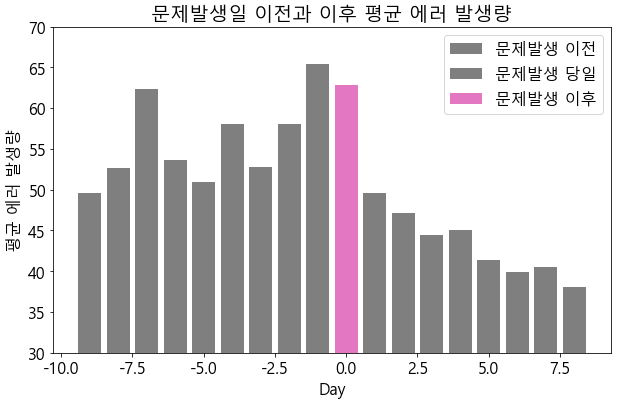

In [147]:
plt.figure(figsize=(10,6))
plt.bar(np.array(range(len(before_mean)))-9, before_mean, color='tab:gray', label='문제발생 이전')
plt.bar(np.array(range(len(before_mean)-1, len(before_mean) + len(after_mean)-1))-9, after_mean, color='tab:gray', label='문제발생 당일')
plt.bar([len(before_mean)-10], before_mean[-1], color='tab:pink', label='문제발생 이후')
plt.ylim([30, 70])
plt.ylabel('평균 에러 발생량')
plt.xlabel('Day')
plt.legend()
plt.title('문제발생일 이전과 이후 평균 에러 발생량')
# plt.savefig('문제발생일 이전과 이후 평균 에러 발생량.png', dpi=100)
plt.show()